In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [6]:
books = pd.read_csv("C:\\Data science\\Data sets\\Association\\books.csv")
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [51]:
# for raw data
from collections import Counter,OrderedDict

item_freq = Counter(books)
item_freq = sorted(item_freq.items(),key = lambda x:x[1])

freq = list(reversed([i[1] for i in item_freq]))
item = list(reversed([i[0] for i in item_freq]))
item

['Florence',
 'ItalArt',
 'ItalAtlas',
 'ItalCook',
 'GeogBks',
 'ArtBks',
 'RefBks',
 'DoItYBks',
 'CookBks',
 'YouthBks',
 'ChildBks']

In [63]:
#Apriori model  
frequent_itemsets = apriori(books, min_support=0.05, max_len=3,use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
71,0.0640,"(CookBks, GeogBks, ItalCook)"
72,0.0535,"(DoItYBks, RefBks, ArtBks)"
73,0.0585,"(GeogBks, DoItYBks, RefBks)"
74,0.0730,"(DoItYBks, GeogBks, ArtBks)"


In [42]:
frequent_itemsets.itemsets[1:11]

1      (YouthBks)
2       (CookBks)
3      (DoItYBks)
4        (RefBks)
5        (ArtBks)
6       (GeogBks)
7      (ItalCook)
8     (ItalAtlas)
9       (ItalArt)
10     (Florence)
Name: itemsets, dtype: object

In [307]:
rule = association_rules(frequent_itemsets,metric="lift",min_threshold = 1)
#rulec = association_rules(frequent_itemsets,metric = "confidence",min_threshold=0.8)
#rule_s = association_rules(frequent_itemsets,metric="support",min_threshold=0.1)
sample =rule.sort_values('lift',ascending = False).head(10)
sample

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
180,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
185,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
259,"(CookBks, ArtBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
262,(ItalCook),"(CookBks, ArtBks)",0.1135,0.1670,0.0565,0.497797,2.980822,0.037545,1.658693
264,"(CookBks, GeogBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
269,(ItalCook),"(CookBks, GeogBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
113,(ItalCook),"(CookBks, ChildBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
108,"(CookBks, ChildBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
239,(ItalCook),"(CookBks, DoItYBks)",0.1135,0.1875,0.0585,0.515419,2.748899,0.037219,1.676705
234,"(CookBks, DoItYBks)",(ItalCook),0.1875,0.1135,0.0585,0.312000,2.748899,0.037219,1.288517


In [301]:
rule_columns=rule[['antecedents','consequents','support','confidence','lift']]
rule_columns

,antecedents,consequents,support,confidence,lift
0,(ChildBks),(YouthBks),0.1650,0.390071,1.576044
1,(YouthBks),(ChildBks),0.1650,0.666667,1.576044
2,(CookBks),(ChildBks),0.2560,0.593968,1.404179
3,(ChildBks),(CookBks),0.2560,0.605201,1.404179
4,(ChildBks),(DoItYBks),0.1840,0.434988,1.542511
5,(DoItYBks),(ChildBks),0.1840,0.652482,1.542511
6,(ChildBks),(RefBks),0.1515,0.358156,1.669725
7,(RefBks),(ChildBks),0.1515,0.706294,1.669725
8,(ChildBks),(ArtBks),0.1625,0.384161,1.594028
9,(ArtBks),(ChildBks),0.1625,0.674274,1.594028


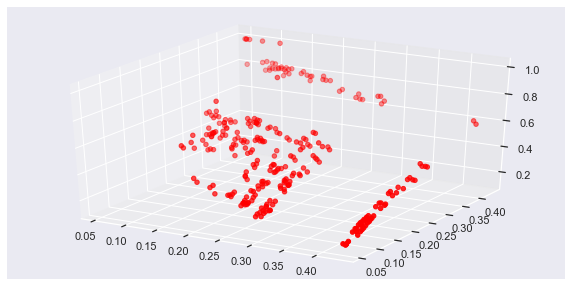

In [311]:
fig = plt.figure(figsize=(10,5))
ax= fig.add_subplot(111,projection="3d")
X = rule[['antecedent support']]
Y = rule[['consequent support']]
Z = rule[['confidence']]
ax.scatter(X,Y,Z,c="red")
#plt.scatter(X,Y,c="red")


In [236]:
#------------------Movie data
movies = pd.read_csv("C:\\Data science\\Data sets\\Association\\my_movies.csv")
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [238]:
movies_L = []
for i in movies:
    
    movies_L.append(i.split(","))

all_movies_L = [i for item in movies_L for i in item]
movies_L

[['Sixth Sense'],
 ['Gladiator'],
 ['LOTR1'],
 ['Harry Potter1'],
 ['Patriot'],
 ['LOTR2'],
 ['Harry Potter2'],
 ['LOTR'],
 ['Braveheart'],
 ['Green Mile']]

In [237]:
# creating transacation data
#movie_s = pd.DataFrame(pd.Series(movies_L))
#movie_s = movie_s.iloc[:,:15] # removing the last empty transaction
#movie_s.columns = ["Transaction"]
#X = movie_s["Transaction"].str.join(sep='*').str.get_dummies(sep='*')
#X

In [284]:
fr_itemsets = apriori(movies, min_support=0.05, max_len=3,use_colnames = True)
fr_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [285]:
a_rule = association_rules(fr_itemsets,metric="lift",min_threshold = 1 )
a_rule
#rulec = association_rules(frequent_itemsets,metric = "confidence",min_threshold=0.8)
#rule_s = association_rules(frequent_itemsets,metric="support",min_threshold=0.1)
a_rule.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
99,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
94,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
100,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
60,"(LOTR1, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
31,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
98,(Green Mile),"(Gladiator, LOTR)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
95,"(Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
86,(Green Mile),"(LOTR, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
85,(LOTR),"(Green Mile, Sixth Sense)",0.1,0.2,0.1,1.0,5.0,0.08,inf
84,"(Green Mile, Sixth Sense)",(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [295]:
arule_columns=a_rule[['antecedents','consequents','support','confidence','lift']]
sample10 = arule_columns.head(10)
sample10

,antecedents,consequents,support,confidence,lift
0,(Gladiator),(Sixth Sense),0.5,0.714286,1.190476
1,(Sixth Sense),(Gladiator),0.5,0.833333,1.190476
2,(Patriot),(Sixth Sense),0.4,0.666667,1.111111
3,(Sixth Sense),(Patriot),0.4,0.666667,1.111111
4,(LOTR),(Sixth Sense),0.1,1.000000,1.666667
5,(Sixth Sense),(LOTR),0.1,0.166667,1.666667
6,(Green Mile),(Sixth Sense),0.2,1.000000,1.666667
7,(Sixth Sense),(Green Mile),0.2,0.333333,1.666667
8,(Patriot),(Gladiator),0.6,1.000000,1.428571
9,(Gladiator),(Patriot),0.6,0.857143,1.428571


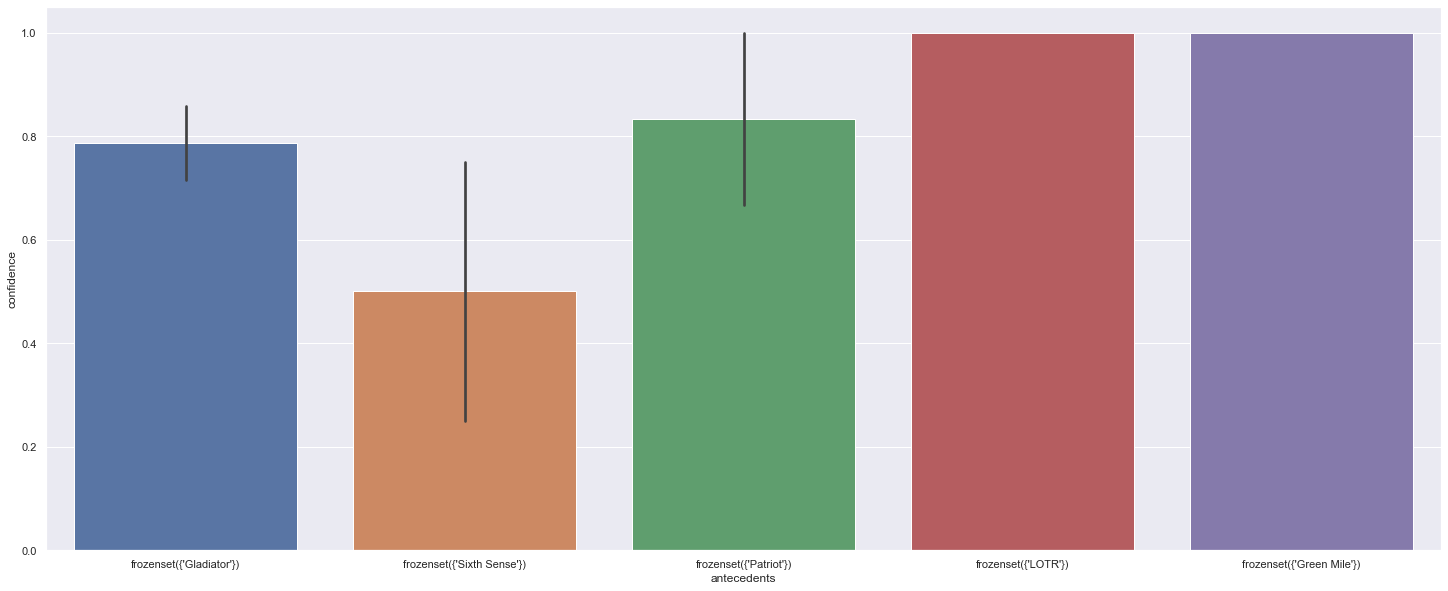

In [298]:
fig,ax = plt.subplots(figsize=(25,10))
#ax = sns.barplot(x=sample10['antecedents'], y=sample10['support'], data=sample10)
ax = sns.barplot(x=sample10['antecedents'], y=sample10['confidence'], data=sample10)